In [1]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('data.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display dataset information
print("\nDataset information:")
print(df.info())


# Display summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Clean the dataset by removing rows with missing values
df_cleaned = df.dropna()

# Verify missing values after cleaning
print("\nMissing values after cleaning:")
print(df_cleaned.isnull().sum())

# Save the cleaned dataset to a new CSV file
cleaned_file_path = 'cleaned_data.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned data saved to {cleaned_file_path}")


Saving data.csv to data.csv
First few rows of the dataset:
   Age  Gender  Total Bilirubin  Direct Bilirubin  Alkaline Phosphotase  \
0   65       1              0.7               0.1                   187   
1   62       0             10.9               5.5                   699   
2   62       0              7.3               4.1                   490   
3   58       0              1.0               0.4                   182   
4   72       0              3.9               2.0                   195   

   Alamine Aminotransferase  Aspartate Aminotransferase  Total Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio 

Summary statistics of the dataset:
              Age      Gender  Total Bilirubin  Direct Bilirubin  \
count  583.000000  583.000000       583.000000        583.000000   
mean    44.746141    0.243568         3.298799          1.486106   
std     16.189833    0.429603         6.209522          2.808498   
min      4.000000    0.000000         0.400000          0.100000   
25%     33.000000    0.000000         0.800000          0.200000   
50%     45.000000    0.000000         1.000000          0.300000   
75%     58.000000    0.000000         2.600000          1.300000   
max     90.000000    1.000000        75.000000         19.700000   

       Alkaline Phosphotase  Alamine Aminotransferase  \
count            583.000000                583.000000   
mean             290.576329                 80.713551   
std              242.937989                182.620356   
min               63.000000                 10.000000   
25%              175.500000                 23.000000   
50%       

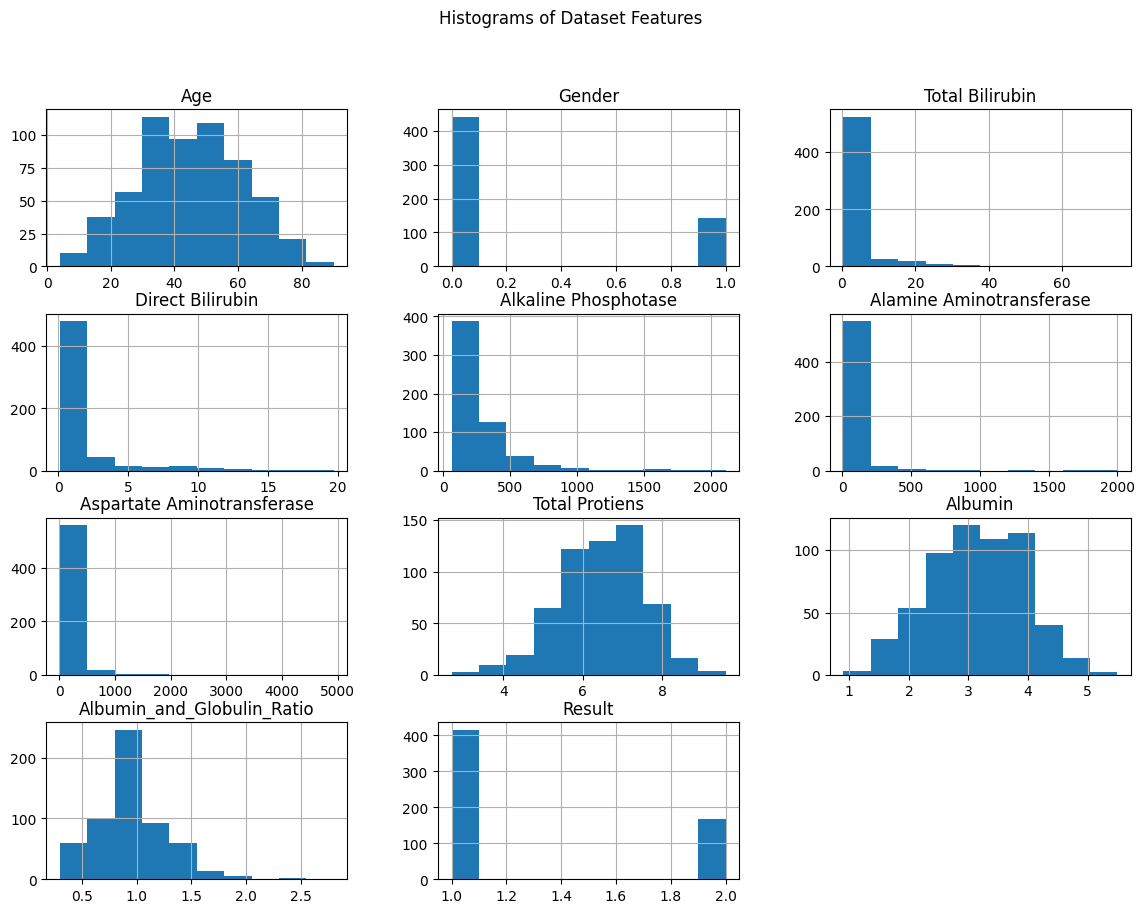


Generating box plots for each feature...


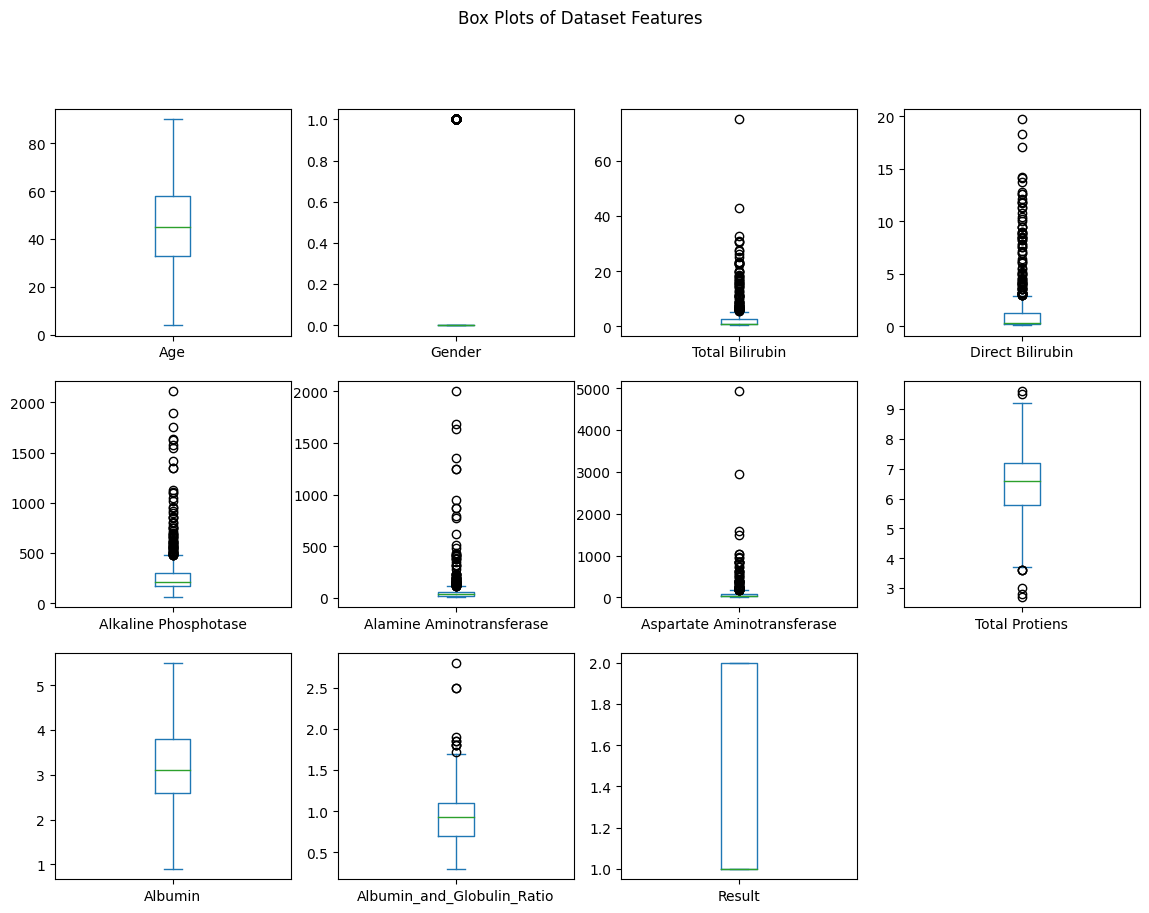


Generating scatter plot between Age and Total Bilirubin...


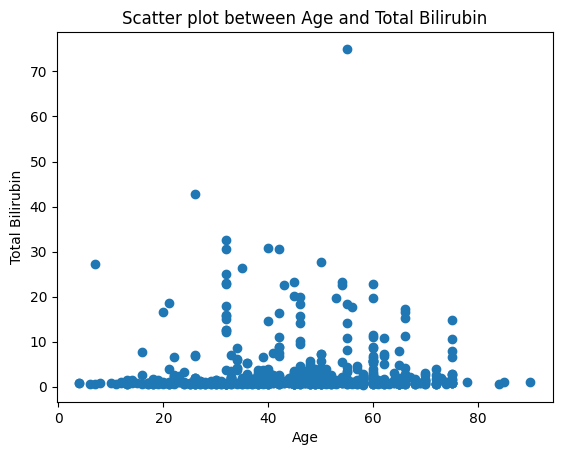


Correlation matrix of the dataset:
                                 Age    Gender  Total Bilirubin  \
Age                         1.000000 -0.056560         0.011763   
Gender                     -0.056560  1.000000        -0.089291   
Total Bilirubin             0.011763 -0.089291         1.000000   
Direct Bilirubin            0.007529 -0.100436         0.874618   
Alkaline Phosphotase        0.080425  0.027496         0.206669   
Alamine Aminotransferase   -0.086883 -0.082332         0.214065   
Aspartate Aminotransferase -0.019910 -0.080336         0.237831   
Total Protiens             -0.187461  0.089121        -0.008099   
Albumin                    -0.265924  0.093799        -0.222250   
Albumin_and_Globulin_Ratio -0.215900  0.002581        -0.203849   
Result                     -0.137351  0.082416        -0.220208   

                            Direct Bilirubin  Alkaline Phosphotase  \
Age                                 0.007529              0.080425   
Gender             

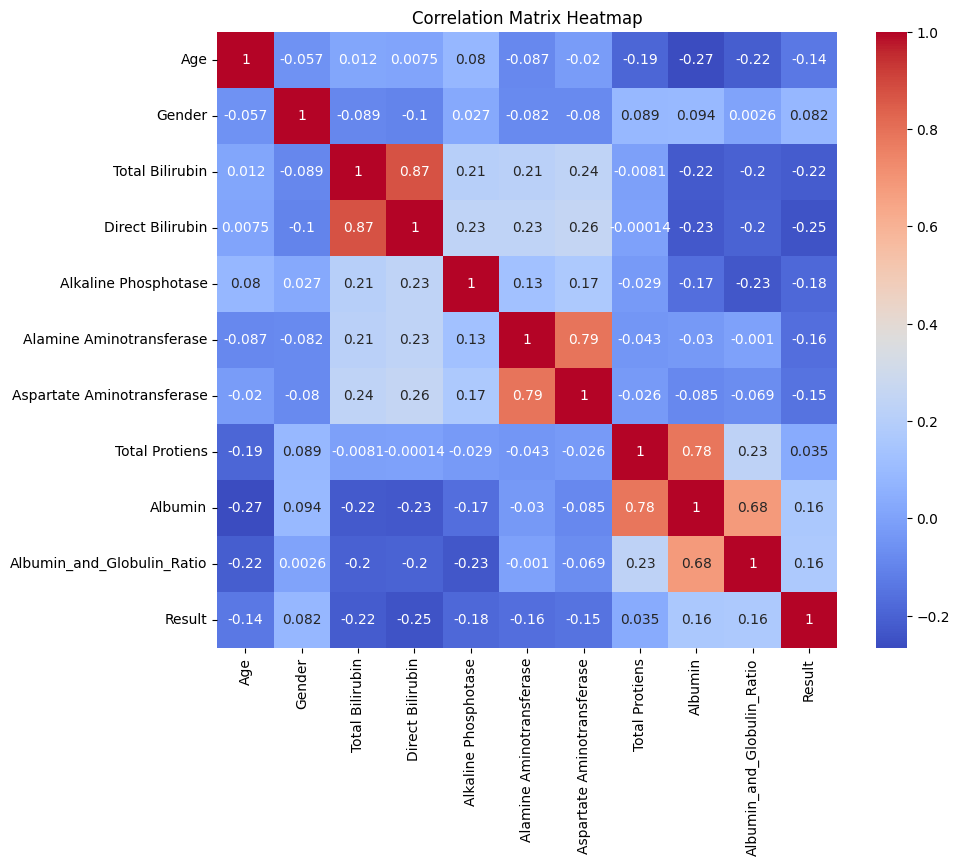


Generating pairplot of the dataset...


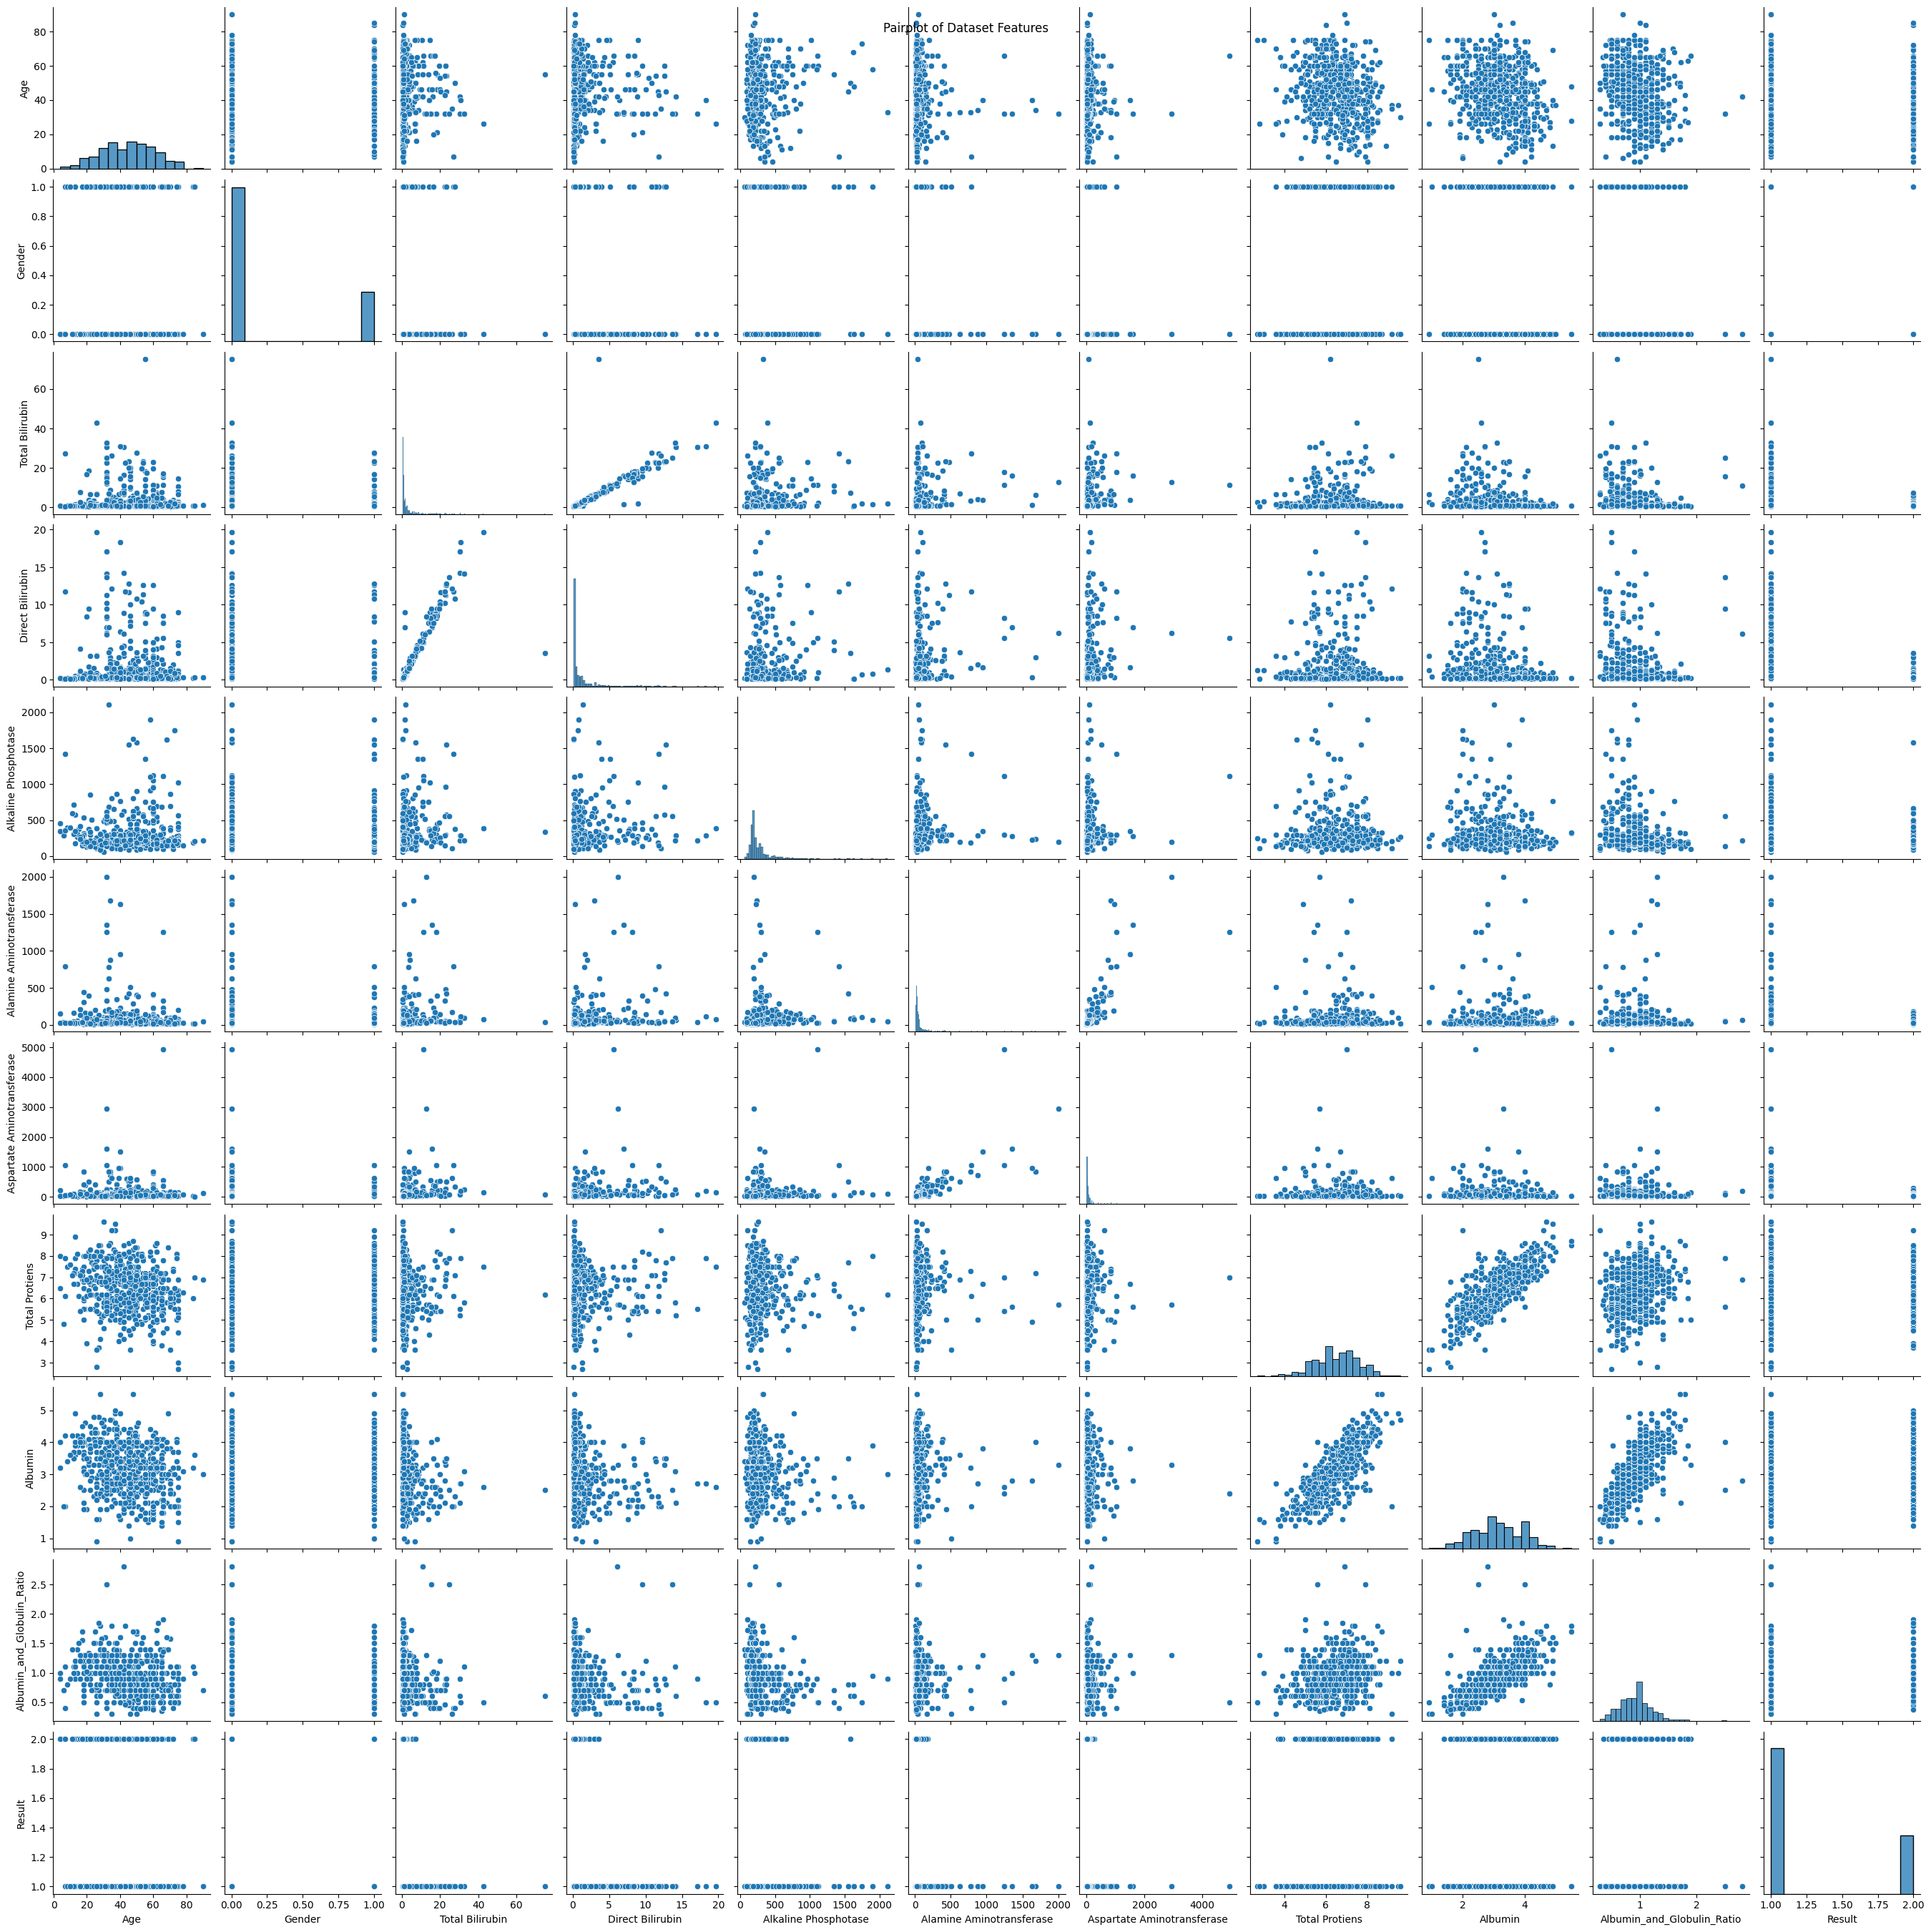

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
cleaned_file_path = 'cleaned_data.csv'
df = pd.read_csv(cleaned_file_path)

# Display summary statistics
print("Summary statistics of the dataset:")
print(df.describe())

# Plot histograms for each feature
print("\nGenerating histograms for each feature...")
df.hist(figsize=(14, 10))
plt.suptitle('Histograms of Dataset Features')
plt.show()

# Plot box plots for each feature
print("\nGenerating box plots for each feature...")
df.plot(kind='box', subplots=True, layout=(3, 4), figsize=(14, 10))
plt.suptitle('Box Plots of Dataset Features')
plt.show()


# Scatter plot between Age and Total Bilirubin
print("\nGenerating scatter plot between Age and Total Bilirubin...")
plt.scatter(df['Age'], df['Total Bilirubin'])
plt.xlabel('Age')
plt.ylabel('Total Bilirubin')
plt.title('Scatter plot between Age and Total Bilirubin')
plt.show()

# Display the correlation matrix
print("\nCorrelation matrix of the dataset:")
corr_matrix = df.corr()
print(corr_matrix)

# Heatmap of the correlation matrix
print("\nGenerating heatmap of the correlation matrix...")
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Pairplot of the dataset
print("\nGenerating pairplot of the dataset...")
sns.pairplot(df)
plt.suptitle('Pairplot of Dataset Features')
plt.show()


In [ ]:
#The EDA report
#The outliers can be found in the columns Alkaline Phosphotase, Alamine Aminotransferase, Total Bilirubin, Aspartate Aminotransferase
#While examining the scatter plot it gives us a non-linear relationship
#Total Bilirubin, Direct Bilirubin, Alkaline Phosphotase, Alamine Aminotransferase, Aspartate Aminotransferase are right-skewed
#The Total Bilirubin, Direct Bilirubin, Alamine Aminotransferase, Aspartate Aminotransferase have high correlation

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

#Load the cleaned data file

cleaned_file_path = 'cleaned_data.csv'
df = pd.read_csv(cleaned_file_path)

# Define the list of numeric features to be scaled

numeric_features = ['Age', 'Total Bilirubin', 'Direct Bilirubin',
                    'Alkaline Phosphotase', 'Alamine Aminotransferase',
                    'Aspartate Aminotransferase', 'Total Protiens',
                    'Albumin', 'Albumin_and_Globulin_Ratio']


# Initialize the StandardScaler

scaler = StandardScaler()

# Scale the numeric features
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Encode the categorical 'Gender' feature using one-hot encoding
df = pd.get_dummies(df, columns=['Gender'])

# Save the processed dataset to a new CSV file
df.to_csv('cleaned_and_feature_engineered_data.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the cleaned and feature-engineered dataset
df = pd.read_csv('cleaned_and_feature_engineered_data.csv')

# Separate features and target variable
X = df.drop('Result', axis=1)
y = df['Result']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
rf_model = RandomForestClassifier()
svc_model = SVC()
knn_model = KNeighborsClassifier()

# Train the models
rf_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)


# Make predictions on the test set
rf_preds = rf_model.predict(X_test)
svc_preds = svc_model.predict(X_test)
knn_preds = knn_model.predict(X_test)

# For RandomForest Classifier
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds)
rf_recall = recall_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds)
rf_roc_auc = roc_auc_score(y_test, rf_preds)

#For Support Vector Model
svc_accuracy = accuracy_score(y_test, svc_preds)
svc_precision = precision_score(y_test, svc_preds)
svc_recall = recall_score(y_test, svc_preds)
svc_f1 = f1_score(y_test, svc_preds)
svc_roc_auc = roc_auc_score(y_test, svc_preds)

#For K-Nearest Neighbour
knn_accuracy = accuracy_score(y_test, knn_preds)
knn_precision = precision_score(y_test, knn_preds)
knn_recall = recall_score(y_test, knn_preds)
knn_f1 = f1_score(y_test, knn_preds)
knn_roc_auc = roc_auc_score(y_test, knn_preds)

print("Random Forest Classifier:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("ROC AUC Score:", rf_roc_auc)

print("\nSupport Vector Machine Classifier:")
print("Accuracy:", svc_accuracy)
print("Precision:", svc_precision)
print("Recall:", svc_recall)
print("F1 Score:", svc_f1)
print("ROC AUC Score:", svc_roc_auc)

print("\nK Neighbors Classifier:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)
print("ROC AUC Score:", knn_roc_auc)


Random Forest Classifier:
Accuracy: 0.7521367521367521
Precision: 0.8085106382978723
Recall: 0.8735632183908046
F1 Score: 0.839779005524862
ROC AUC Score: 0.6367816091954023

Support Vector Machine Classifier:
Accuracy: 0.7435897435897436
Precision: 0.7435897435897436
Recall: 1.0
F1 Score: 0.8529411764705882
ROC AUC Score: 0.5

K Neighbors Classifier:
Accuracy: 0.6495726495726496
Precision: 0.7948717948717948
Recall: 0.7126436781609196
F1 Score: 0.7515151515151515
ROC AUC Score: 0.5896551724137932
